## Gráfico de series temporales 1

Vamos a trabajar con un conjunto de datos extraído desde esta página de Kaggle que contiene información histórica de temperaturas del planeta Tierra. El fichero global-temperatures.csv se ha descargado para su tratamiento.
Gráfico en el que se representan todas las mediciones históricas de la temperatura media global del planeta y añadimos una línea de tendencia:

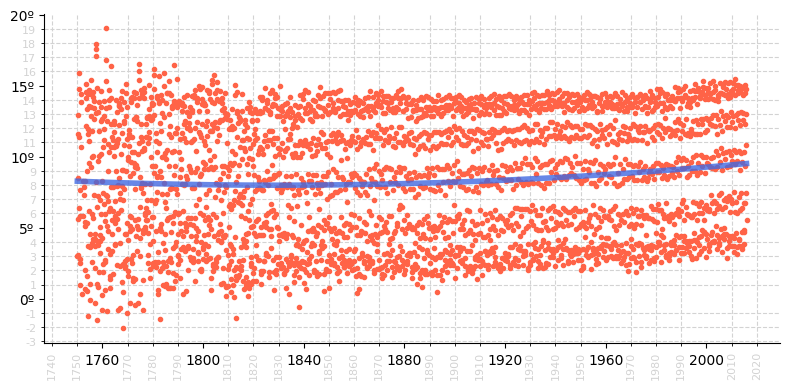

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Necesitamos algunas utilidades de gestión de fechas
from matplotlib.dates import YearLocator, DateFormatter, date2num
from matplotlib.ticker import MultipleLocator


df = pd.read_csv('./datos/global-temperatures.csv',
                 parse_dates=['dt'],  # conversión a tipo datetime
                 usecols=['dt', 'LandAverageTemperature'])

df.rename(columns={'dt': 'when', 'LandAverageTemperature': 'temp'}, inplace=True) # Renombrar columnas
df.dropna(inplace=True) # Eliminamos valores nulos            

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400 px

# Alias para simplificar el acceso
x = df.when
y = df.temp

ax.plot(x, y,
        linestyle='None', marker='.', color='tomato',  # estilo de línea
        zorder=2)  # orden para colocar sobre rejilla

# Construcción de la línea de tendencia
x = date2num(x)
z = np.polyfit(x, y, 2)  # ajuste polinómico de grado 2
p = np.poly1d(z)
plt.plot(x, p(x), linewidth=4, alpha=0.8, color='royalblue')

# Formateo de los ejes
ax.xaxis.set_minor_locator(YearLocator(10))
ax.xaxis.set_minor_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', which='minor',
               labelsize=8, labelcolor='lightgray', rotation=90)
ax.xaxis.grid(which='minor', color='lightgray', linestyle='dashed')
ax.yaxis.set_major_formatter('{x:.0f}º')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='y', which='minor',
               labelsize=8, labelcolor='lightgray')
ax.yaxis.grid(which='minor', linestyle='dashed', color='lightgray')
ax.yaxis.set_minor_formatter('{x:.0f}')
ax.tick_params(axis='y', which='minor', labelsize=8, labelcolor='lightgray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()